In [1]:
# load dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, Normalizer
from sklearn.decomposition import PCA as sklearnPCA
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
import time

In [2]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

cancer = pd.read_csv('breast_cancer.csv')



X_train, X_test, y_train, y_test = train_test_split(cancer.loc[:,"mean radius":"worst fractal dimension"],cancer['target'], stratify=cancer['target'], random_state=0)

svm_model = SVC()
svm_model.fit(X_train, y_train)

print('The accuracy on the training subset: {:.3f}'.format(svm_model.score(X_train, y_train)))
print('The accuracy on the testing subset: {:.3f}'.format(svm_model.score(X_test, y_test)))

The accuracy on the training subset: 1.000
The accuracy on the testing subset: 0.629


In [3]:
min_train = X_train.min(axis=0)
range_train = (X_train - min_train).max(axis=0)

X_train_scaled = (X_train - min_train)/range_train

print('Minimum per feature\n{}'.format(X_train_scaled.min(axis=0)))
print('Maximum per feature\n{}'.format(X_train_scaled.max(axis=0)))

Minimum per feature
mean radius                0.0
mean texture               0.0
mean perimeter             0.0
mean area                  0.0
mean smoothness            0.0
mean compactness           0.0
mean concavity             0.0
mean concave points        0.0
mean symmetry              0.0
mean fractal dimension     0.0
radius error               0.0
texture error              0.0
perimeter error            0.0
area error                 0.0
smoothness error           0.0
compactness error          0.0
concavity error            0.0
concave points error       0.0
symmetry error             0.0
fractal dimension error    0.0
worst radius               0.0
worst texture              0.0
worst perimeter            0.0
worst area                 0.0
worst smoothness           0.0
worst compactness          0.0
worst concavity            0.0
worst concave points       0.0
worst symmetry             0.0
worst fractal dimension    0.0
dtype: float64
Maximum per feature
mean radius    

In [4]:
X_test_scaled = (X_test - min_train)/range_train

svm = SVC()
svm.fit(X_train_scaled, y_train)

print('The accuracy on the training subset: {:.3f}'.format(svm.score(X_train_scaled, y_train)))
print('The accuracy on the test subset: {:.3f}'.format(svm.score(X_test_scaled, y_test)))




The accuracy on the training subset: 0.955
The accuracy on the test subset: 0.951


In [5]:
svm = SVC(C=800)
svm.fit(X_train_scaled, y_train) 

print('The accuracy on the training subset: {:.3f}'.format(svm.score(X_train_scaled, y_train)))
print('The accuracy on the test subset: {:.3f}'.format(svm.score(X_test_scaled, y_test)))

The accuracy on the training subset: 0.993
The accuracy on the test subset: 0.965


In [11]:
svm = SVC(C=1000)
svm.fit(X_train_scaled, y_train) 

print('The accuracy on the training subset: {:.3f}'.format(svm.score(X_train_scaled, y_train)))
print('The accuracy on the test subset: {:.3f}'.format(svm.score(X_test_scaled, y_test)))

The accuracy on the training subset: 0.993
The accuracy on the test subset: 0.972


In [14]:
svm

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [15]:
prediction = svm.predict(X_test_scaled)
prediction

array([1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0])

In [19]:
predict = svm.decision_function(X_test_scaled)
predict

array([  3.20184591,  -6.55342151,  -4.8827998 ,   3.89754654,
        -3.56843131,   1.52154336, -12.30440402, -12.99166778,
        -5.59949531,   4.09443427,  -7.19799382,  -8.26297666,
         0.66931256,   1.62005232,   6.02848495,   7.68305787,
         5.10725969,  -2.21246242,  -0.56217055,  -2.89576533,
         1.37841993, -17.20725073,  -3.1312907 ,   4.55231218,
         4.53510815,  -4.23325436,   3.39786496,   2.30834691,
         3.61833985,  -5.9485176 ,   0.02587134,   3.60469816,
         2.03043175,   4.78971586,   3.4711107 ,   4.41396466,
        -4.4985963 ,  -9.80628623,  -7.54596097,   2.55559233,
        -6.95436704,  -4.38809099,  -5.01658701,  -3.95836667,
         2.98082122,   6.78986069,   5.90484016,   0.35819096,
         0.48213587,   6.4705759 ,  -4.39711233,   4.25319115,
         5.60164943,   6.86660385,   2.18722983,   3.35779753,
         1.90326017,   2.59533605,   1.43799199,   5.13126345,
         1.03020458,   2.16589089,   3.09856961,  -9.48

## Confusion matixs

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

cancer = pd.read_csv('breast_cancer.csv')



X_train, X_test, y_train, y_test = train_test_split(cancer.loc[:,"mean radius":"worst fractal dimension"],cancer['target'], stratify=cancer['target'], test_size = 0.30, random_state=42)

svm_model = SVC()
svm_model.fit(X_train, y_train)

print('The accuracy on the training subset: {:.3f}'.format(svm_model.score(X_train, y_train)))
print('The accuracy on the testing subset: {:.3f}'.format(svm_model.score(X_test, y_test)))



scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVC()
svm_model.fit(X_train_scaled, y_train)

print('The accuracy on the training subset: {:.3f}'.format(svm_model.score(X_train_scaled, y_train)))
print('The accuracy on the testing subset: {:.3f}'.format(svm_model.score(X_test_scaled, y_test)))

The accuracy on the training subset: 1.000
The accuracy on the testing subset: 0.626
The accuracy on the training subset: 0.982
The accuracy on the testing subset: 0.977


In [33]:
predictions = svm_model.predict(X_test_scaled)
print(confusion_matrix(y_test, predictions))

[[ 62   2]
 [  2 105]]


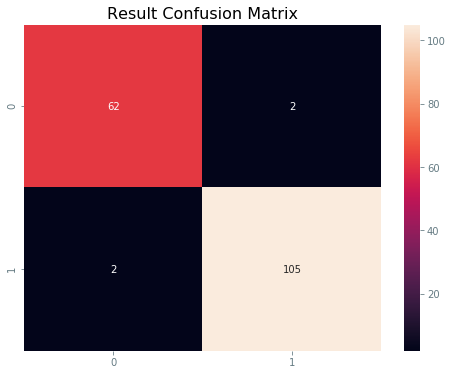

In [52]:
plt.figure(figsize = (8,6))
cm = confusion_matrix(y_test, predictions)                   
sns.heatmap(cm,annot=True,fmt="d")
plt.title("Result Confusion Matrix")
plt.show()